# Homework 1 

In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [3]:
#get the data 
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [4]:
############# functions 

def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

Starting batch size = 32


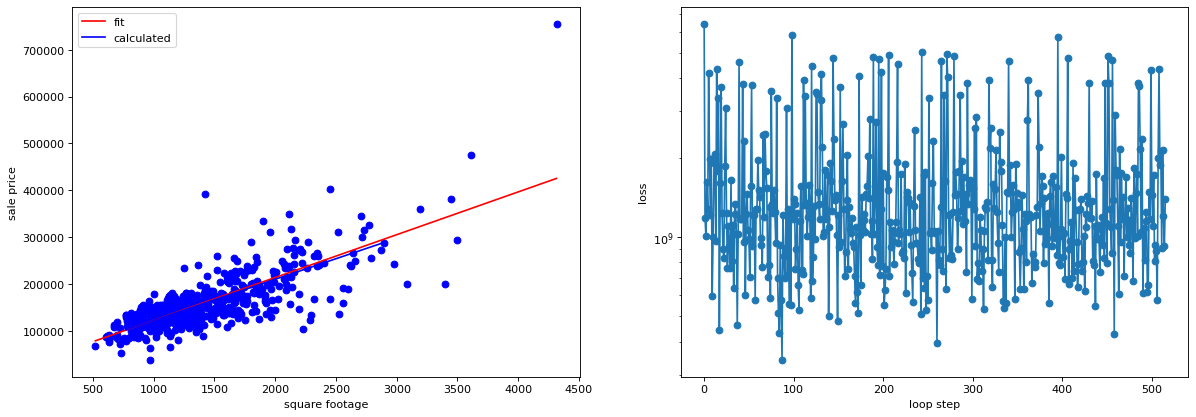

Starting batch size = 64


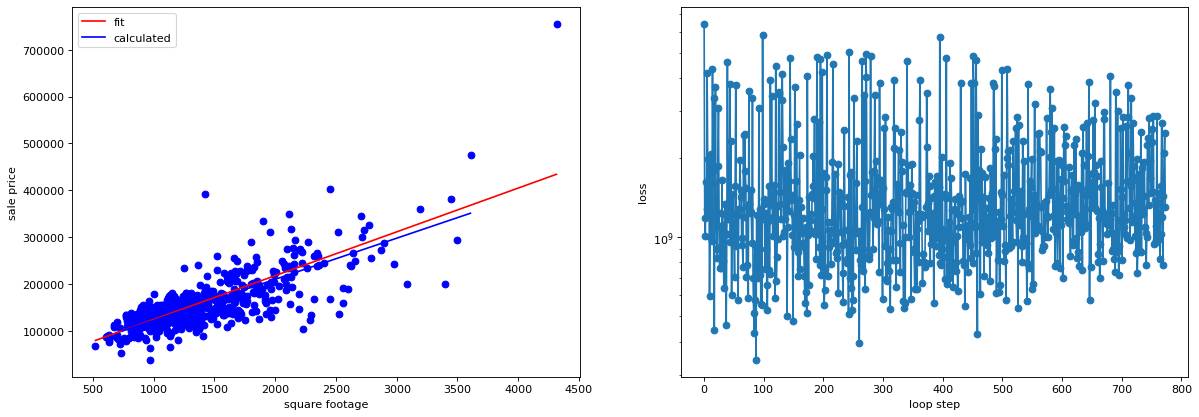

Starting batch size = 128


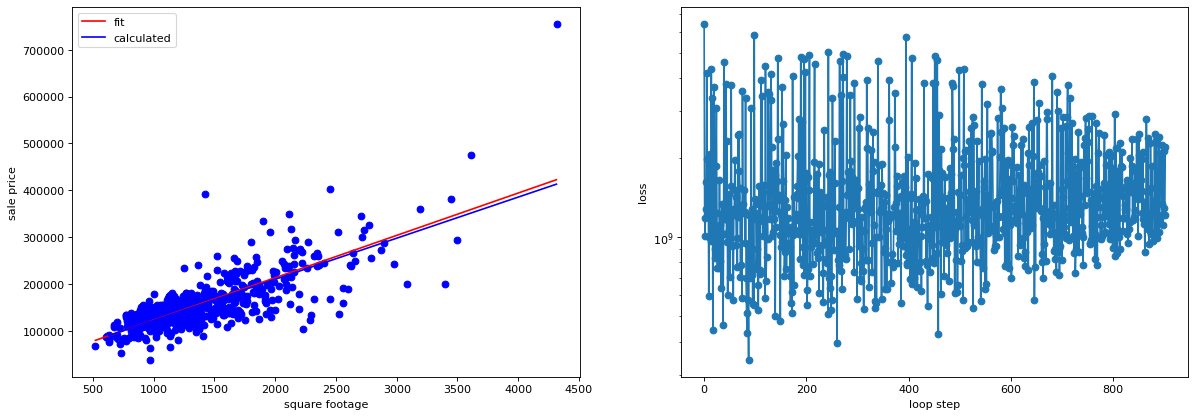

Starting batch size = 256


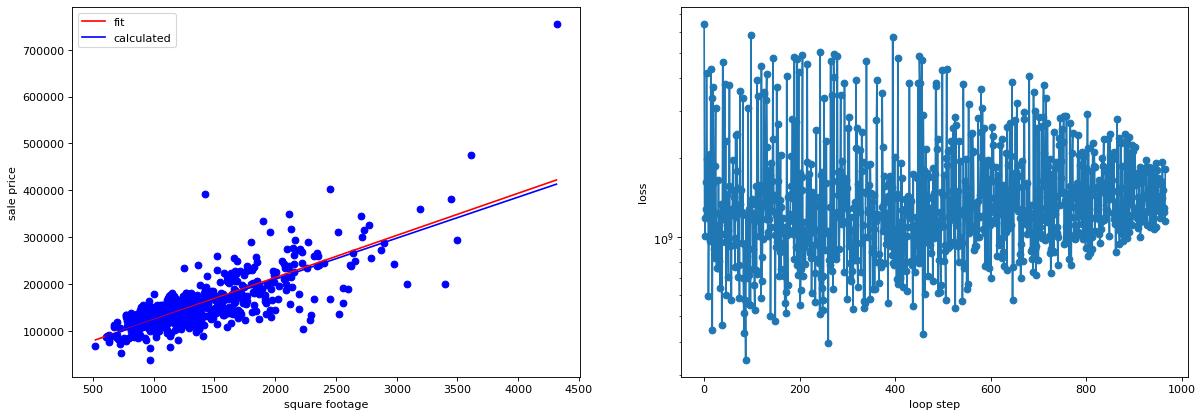

Starting batch size = 512


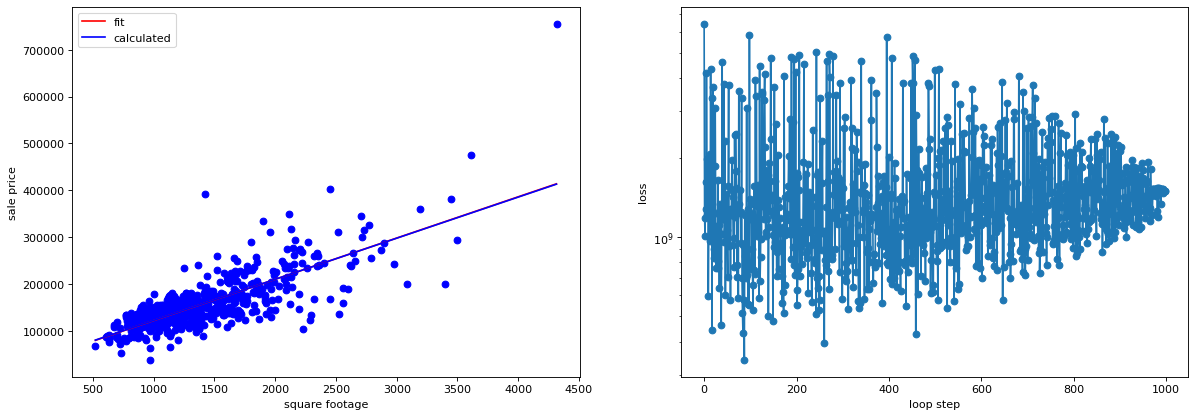

In [5]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()


#linear regression fit 
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
m_calc = m
b_calc = b


########## main loop ###################

# set our initial slope and intercept
m = 5.
b = 1000.
batch_sizes = [32, 64, 128, 256, 512]
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []


for size in batch_sizes:
    print(f"Starting batch size = {size}")
    batch_size = size
    # we run our loop N times
    # loop_N = 30
    loop_N = 30*len(data)//batch_size
    for i in range(loop_N):
       # update our slope and intercept based on the current values
       data_batch = data.sample(batch_size)
       data_x = data_batch['GrLivArea'].to_numpy()
       data_y = data_batch['SalePrice'].to_numpy()
       m = updated_m(data_x,data_y,m,b,learning_rate_m)
       b = updated_b(data_x,data_y,m,b,learning_rate_b)
    
       # calculate the loss value
       loss_value = np.mean(loss(data_x,data_y,m,b))
    
       # keep a history of our loss values
       loss_history.append(loss_value)
    
       # print our progress
       # print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
       
   # close/delete previous plots
    # plt.close('all')
   
    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(x,y,m,b,ax[0])
    
    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')
    
    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()


## Bonus

Times 1: Batch_size = 64, Learning Rate m = 1e-07,  Learning Rate b = 0.1


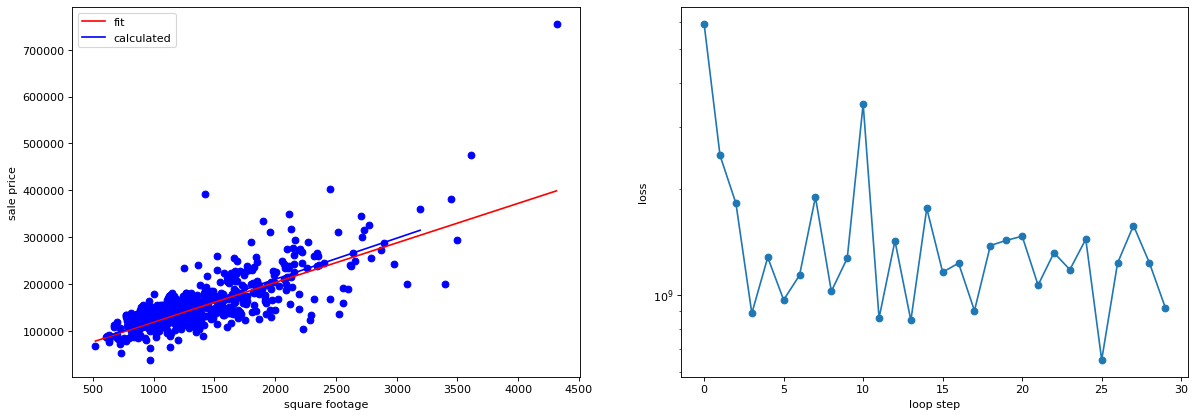

Times 2: Batch_size = 128, Learning Rate m = 1e-07,  Learning Rate b = 0.1


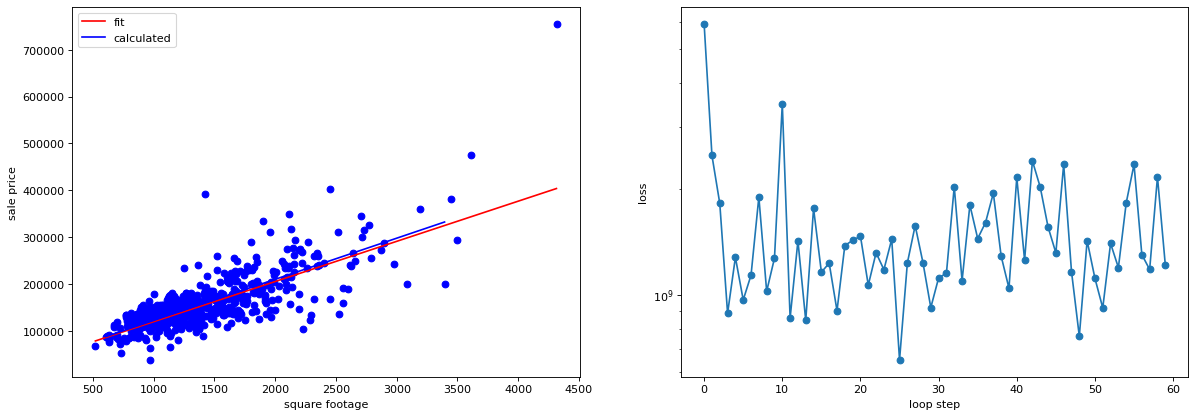

Times 4: Batch_size = 256, Learning Rate m = 1e-07,  Learning Rate b = 0.1


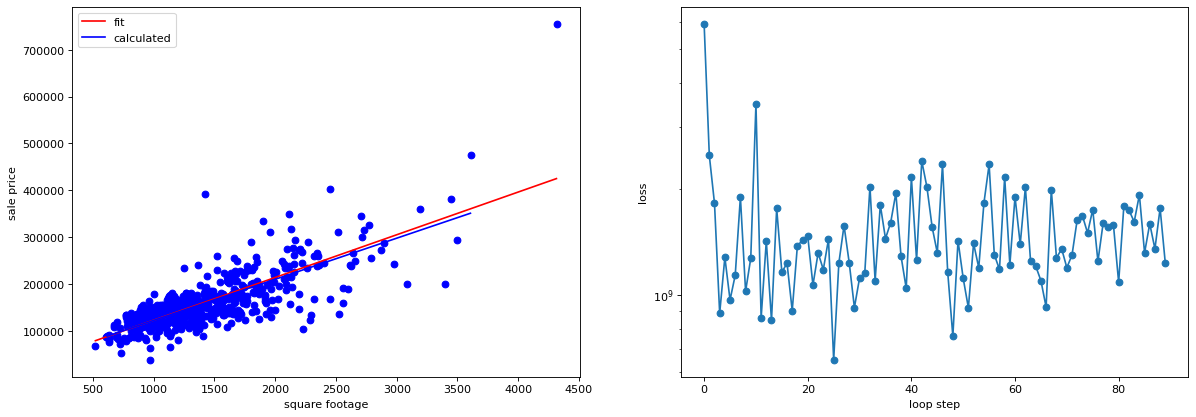

Times 8: Batch_size = 512, Learning Rate m = 1e-07,  Learning Rate b = 0.1


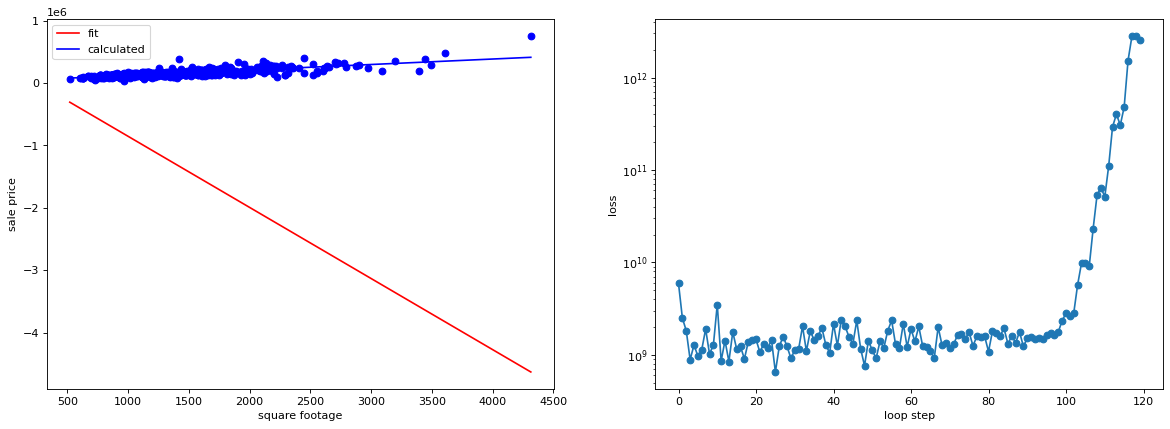

In [7]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()


#linear regression fit 
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
m_calc = m
b_calc = b


########## main loop ###################

# set our initial slope and intercept
m = 5.
b = 1000.
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1

# use these to plot our progress over time
loss_history = []

multipliers= [1,2,4,8]

for multiplier in multipliers: 
    loop_N = 30
    # loop_N = 30*len(data)//batch_size
    for i in range(loop_N):
       # update our slope and intercept based on the current values
       batch_size = 64
       batch_size = batch_size*multiplier
       data_batch = data.sample(batch_size)
       data_x = data_batch['GrLivArea'].to_numpy()
       data_y = data_batch['SalePrice'].to_numpy()
       m = updated_m(data_x,data_y,m,b,learning_rate_m*multiplier)
       b = updated_b(data_x,data_y,m,b,learning_rate_b*multiplier)
    
       # calculate the loss value
       loss_value = np.mean(loss(data_x,data_y,m,b))
    
       # keep a history of our loss values
       loss_history.append(loss_value)
    
    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(x,y,m,b,ax[0])
    
    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')
    
    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    print(f'Times {multiplier}: Batch_size = {batch_size}, Learning Rate m = {learning_rate_m},  Learning Rate b = {learning_rate_b}')
    plt.show()
